In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Affichage complet des colonnes
pd.set_option('display.max_columns', None)


eng_df = pd.read_csv("Data/eng_dataset.csv")
go_emotions_df = pd.read_csv("Data/go_emotions_dataset.csv")


print("ENG Dataset")
display(eng_df.head())

print("\n GoEmotions Dataset")
display(go_emotions_df.head())


ENG Dataset


,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...



 GoEmotions Dataset


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
print("ENG Dataset - Dimensions :", eng_df.shape)
print("\nColonnes :", eng_df.columns.tolist())
print("\nValeurs manquantes :")
print(eng_df.isnull().sum())

print("\nÉchantillon :")
display(eng_df.sample(5))


ENG Dataset - Dimensions : (7102, 3)

Colonnes : ['ID', 'sentiment', 'content']

Valeurs manquantes :
ID           0
sentiment    0
content      0
dtype: int64

Échantillon :


,ID,sentiment,content
6095,30602,joy,"Trying to loveee somebody, just wanna love som..."
4447,20101,fear,Andrew's hands start shaking and he says 'I ho...
4677,20331,fear,Recording some more #FNAF and had to FaceTime ...
4832,20486,fear,Man Utd are shambles that was horrific ðŸ˜­ðŸ˜...
3796,10307,anger,... flat party and I instantly get bollocked a...


C:\Users\aboub\AppData\Local\Temp\ipykernel_1608\301268228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=eng_df, order=eng_df['sentiment'].value_counts().index, palette='Set2')


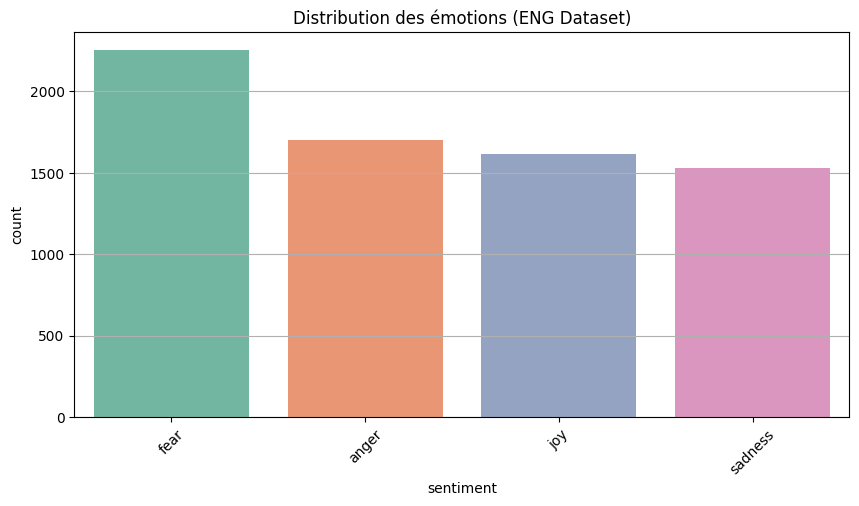

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x='sentiment', data=eng_df, order=eng_df['sentiment'].value_counts().index, palette='Set2')
plt.title("Distribution des émotions (ENG Dataset)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


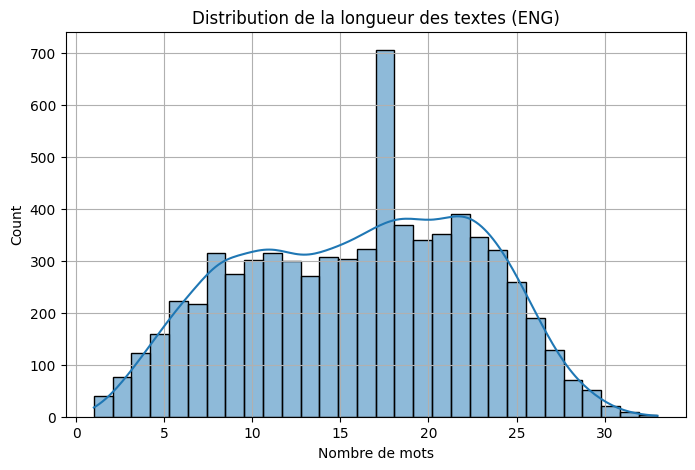

In [68]:
eng_df["text_length"] = eng_df["content"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(eng_df["text_length"], bins=30, kde=True)
plt.title("Distribution de la longueur des textes (ENG)")
plt.xlabel("Nombre de mots")
plt.grid()
plt.show()


In [69]:
go_df_clean = go_emotions_df[~go_emotions_df["example_very_unclear"]].copy()
print("GoEmotions Dataset (nettoyé) - Dimensions :", go_df_clean.shape)
print("\nColonnes émotionnelles :", go_df_clean.columns[3:].tolist()[:10], "...")


GoEmotions Dataset (nettoyé) - Dimensions : (207814, 31)

Colonnes émotionnelles : ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment'] ...


C:\Users\aboub\AppData\Local\Temp\ipykernel_1608\1290757986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=go_label_counts.index, y=go_label_counts.values, palette='coolwarm')


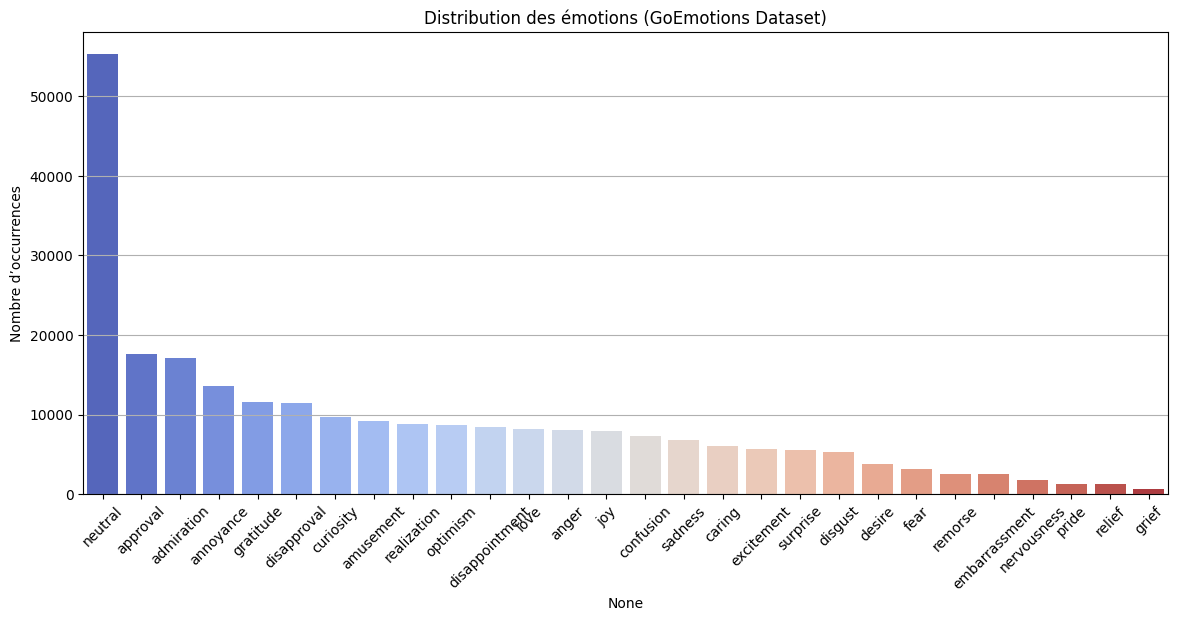

In [70]:
emotion_columns = go_df_clean.columns[3:]
go_label_counts = go_df_clean[emotion_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=go_label_counts.index, y=go_label_counts.values, palette='coolwarm')
plt.title("Distribution des émotions (GoEmotions Dataset)")
plt.xticks(rotation=45)
plt.ylabel("Nombre d’occurrences")
plt.grid(axis='y')
plt.show()


C:\Users\aboub\AppData\Local\Temp\ipykernel_1608\1036953249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num_labels", data=go_df_clean, palette='pastel')


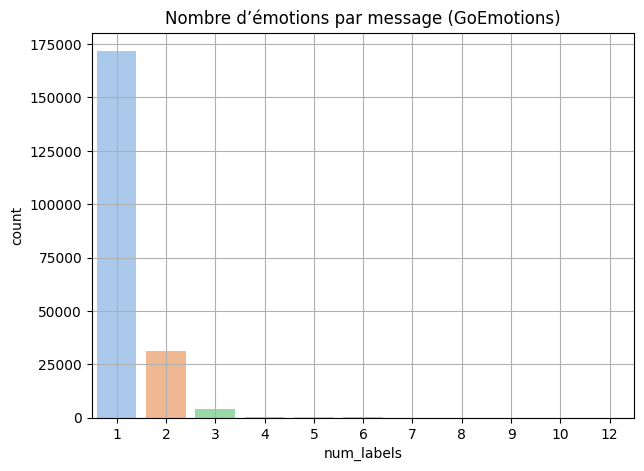

In [71]:
go_df_clean["num_labels"] = go_df_clean[emotion_columns].sum(axis=1)

plt.figure(figsize=(7,5))
sns.countplot(x="num_labels", data=go_df_clean, palette='pastel')
plt.title("Nombre d’émotions par message (GoEmotions)")
plt.grid()
plt.show()


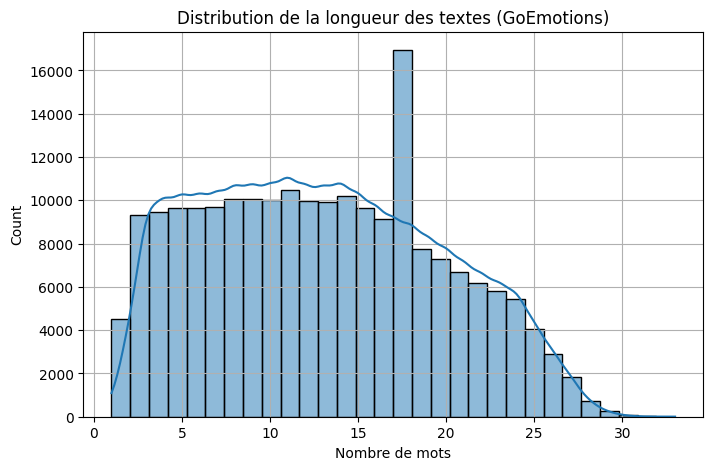

In [72]:
go_df_clean["text_length"] = go_df_clean["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(go_df_clean["text_length"], bins=30, kde=True)
plt.title("Distribution de la longueur des textes (GoEmotions)")
plt.xlabel("Nombre de mots")
plt.grid()
plt.show()


In [ ]:
#  On réutilise la version nettoyée (sans les lignes floues)
go_df_clean = go_emotions_df[~go_emotions_df["example_very_unclear"]].copy()

#  On extrait les colonnes d'émotions
emotion_columns = go_df_clean.columns[3:]

#  Fonction pour récupérer la 1ère émotion active
def get_primary_emotion(row):
    labels = row[emotion_columns]
    active = labels[labels == 1]
    if not active.empty:
        return active.index[0] 
    return None


go_df_clean["label"] = go_df_clean.apply(get_primary_emotion, axis=1)

#  lignes sans étiquette 
go_df_mono = go_df_clean[go_df_clean["label"].notnull()].copy()


print("Taille après transformation mono-label :", go_df_mono.shape)
print("Échantillon :")
display(go_df_mono[["text", "label"]].sample(5))


Taille après transformation mono-label : (207814, 32)
Échantillon :


,text,label
85182,"Hey quick brag, this post was read by [NAME], ...",excitement
36486,I really love this title.,love
39707,Hitting your kids for punishment just makes th...,confusion
46661,[NAME] runs a zone coverage base. [NAME] is mu...,admiration
95883,"I know, you see somehow the world is changing ...",admiration


In [ ]:
# enlève les exemples "très flous"
go_df_clean = go_emotions_df[~go_emotions_df["example_very_unclear"]].copy()

#  le label principal
emotion_columns = go_df_clean.columns[3:]

def get_primary_emotion(row):
    active = row[emotion_columns][row[emotion_columns] == 1]
    return active.index[0] if not active.empty else None

go_df_clean["label"] = go_df_clean.apply(get_primary_emotion, axis=1)
go_df_mono = go_df_clean[go_df_clean["label"].notnull()].copy()

#  Mapping des 28 → 7 émotions
emotion_mapping_7 = {
    "admiration": "joie", "amusement": "joie", "approval": "joie", "caring": "joie",
    "desire": "joie", "excitement": "joie", "gratitude": "joie", "joy": "joie",
    "love": "joie", "optimism": "joie", "pride": "joie", "relief": "joie",
    "anger": "colère", "annoyance": "colère", "disapproval": "colère",
    "disappointment": "tristesse", "grief": "tristesse", "remorse": "tristesse",
    "sadness": "tristesse", "embarrassment": "tristesse",
    "fear": "peur", "nervousness": "peur",
    "surprise": "surprise", "realization": "surprise", "confusion": "surprise", "curiosity": "surprise",
    "disgust": "dégoût",
    "neutral": "neutre"
}

go_df_mono["label_7"] = go_df_mono["label"].map(emotion_mapping_7)
go_df_mono = go_df_mono[go_df_mono["label_7"].notnull()].copy()

#  Vérif
print("Exemples restants :", go_df_mono.shape)
display(go_df_mono[["text", "label", "label_7"]].sample(5))



Classes 7 émotions : ['tristesse' 'neutre' 'joie' 'colère' 'surprise' 'dégoût' 'peur']


,text,label,label_7
199834,They could tag this for all of their videos. T...,neutral,neutre
186063,They were clearly ready for it. [NAME] is in [...,approval,joie
30685,"Yes, this. I love this film.",admiration,joie
29028,Did anybody else noticed the mom right at the ...,confusion,surprise
199736,Happy birthday my guy! Hope you have a great d...,admiration,joie


# Prétraitement des textes

In [ ]:
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"@\w+", "", text)     
    text = re.sub(r"#\w+", "", text)     
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)  
    text = re.sub(r"\d+", "", text)      
    text = re.sub(r"\s+", " ", text).strip()  
    return text

go_df_mono["clean_text"] = go_df_mono["text"].apply(clean_text)


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialisation du vectoriseur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

#  Transformation du texte en vecteurs
X = vectorizer.fit_transform(go_df_mono["clean_text"])  
y = go_df_mono["label_7"]  


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size :", X_train.shape)
print("Test size  :", X_test.shape)

Train size : (166251, 5000)
Test size  : (41563, 5000)


# Train

Classification report :
              precision    recall  f1-score   support

      colère       0.44      0.34      0.38      5760
      dégoût       0.44      0.12      0.19       684
        joie       0.66      0.74      0.70     15887
      neutre       0.44      0.58      0.50     11060
        peur       0.53      0.25      0.34       692
    surprise       0.44      0.24      0.31      4581
   tristesse       0.50      0.27      0.35      2899

    accuracy                           0.54     41563
   macro avg       0.49      0.36      0.39     41563
weighted avg       0.53      0.54      0.52     41563



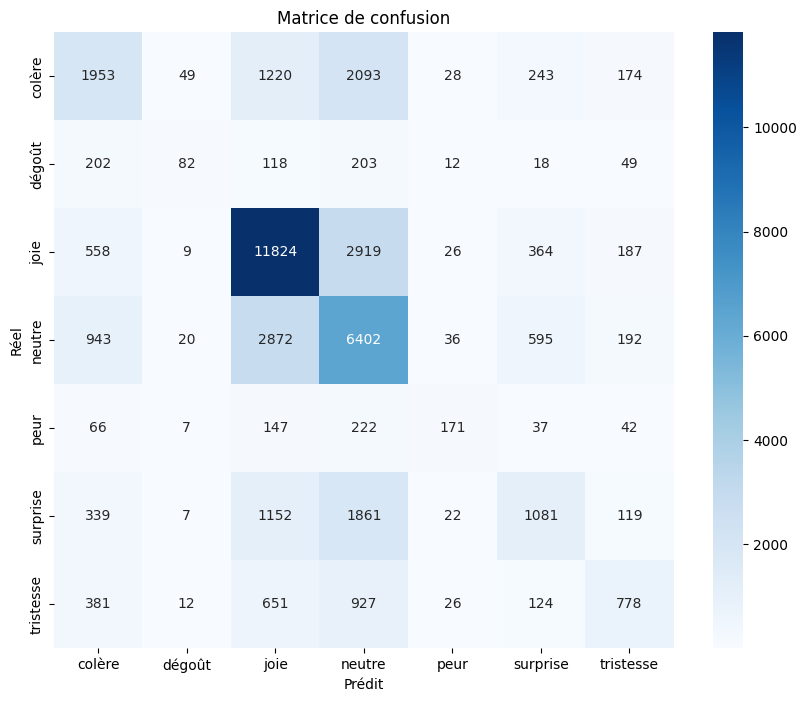

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#  Entraînement du modèle
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#  Prédictionsv
y_pred = model.predict(X_test)

#  Évaluation
print("Classification report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion (optionnel)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


Classification Report (Random Forest):
              precision    recall  f1-score   support

      colère       0.42      0.40      0.41      7201
      dégoût       0.22      0.17      0.19       855
        joie       0.68      0.72      0.70     19859
      neutre       0.48      0.49      0.48     13825
        peur       0.37      0.31      0.34       865
    surprise       0.42      0.37      0.39      5726
   tristesse       0.37      0.33      0.35      3623

    accuracy                           0.53     51954
   macro avg       0.42      0.40      0.41     51954
weighted avg       0.53      0.53      0.53     51954



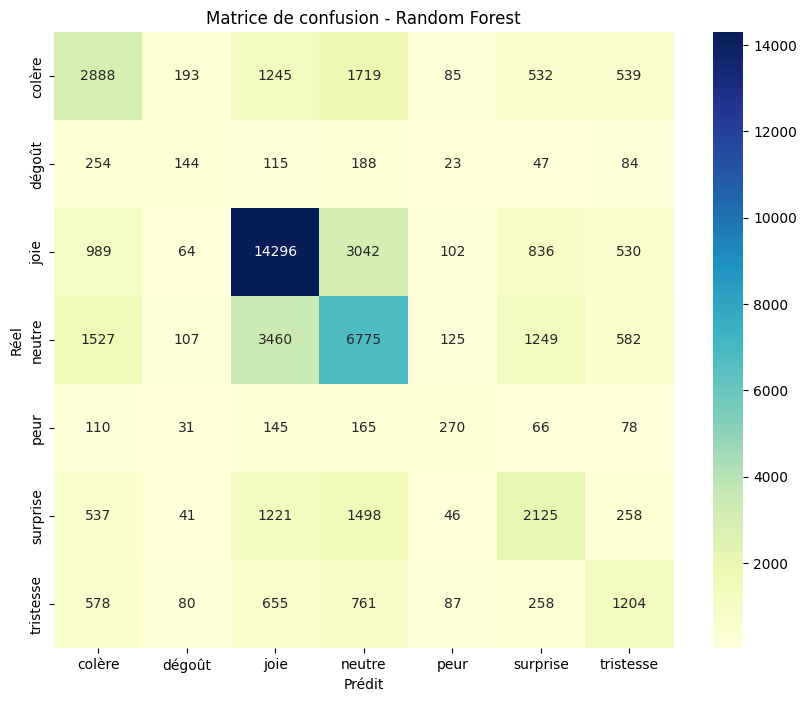

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Entraînement du modèle
rf_model = RandomForestClassifier(
    n_estimators=100,     
    max_depth=None,       # profondeur illimitée
    random_state=42,
    n_jobs=-1             # parallélise sur tous les cœurs disponibles
)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

#  Évaluation
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

#  Matrice de confusion
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_, cmap="YlGnBu")
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


In [ ]:
#  Désactiver les compilateurs automatiques PyTorch (pour éviter l'erreur Inductor)
import os
os.environ["TORCHINDUCTOR_DISABLE"] = "1"
os.environ["TORCH_COMPILE_DISABLE"] = "1"
os.environ["TORCHDYNAMO_DISABLE"] = "1"
os.environ["ACCELERATE_DISABLE"] = "true"


from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
import numpy as np
import torch


model_name = "distilbert-base-uncased"

#  Tokenizer & modèle
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_) 
)

#  Fonction de métriques pour le Trainer
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    report = classification_report(labels, preds, output_dict=True, zero_division=0)
    return {
        "accuracy": report["accuracy"],
        "f1_macro": report["macro avg"]["f1-score"]
    }

#  Encodage prêt 
dataset_encoded.set_format("torch")  

#  TrainingArguments 
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=100,
    logging_dir="./logs",
    report_to="none"  
)

#   Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_encoded["train"],
    eval_dataset=dataset_encoded["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\aboub\AppData\Local\Temp\ipykernel_1608\1789736035.py:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
c:\Users\aboub\anaconda3\envs\Nlp\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,1.555500
200,1.312600
300,1.270700
400,1.258100
500,1.244300
600,1.223700
700,1.184900
800,1.202800


KeyboardInterrupt: 